In [ ]:
%matplotlib inline

In [ ]:
! pip install -U scikit-learn seaborn

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
cd data/gpt-2/

/tf/prototypes/gpt-2/tf2/data/gpt-2


In [3]:
with open('features.pickle', 'rb') as f:
    b = pickle.load(f)

feature_vectors = np.array(list(b.values()))
print(feature_vectors.shape)

(5050, 50257)


In [4]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(feature_vectors)

In [5]:
print(pca_features.shape)

(5050, 2)


In [35]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(pca_features)

colmap = {1: 'r', 2: 'g', 3: 'b'}

labels = kmeans.predict(pca_features)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[0 0 0 ... 0 0 0]
[[-1.3860971e+04  3.5364574e+01]
 [ 1.8175114e+06  1.6282111e+03]
 [ 2.5255256e+05 -9.6730780e+02]]


In [33]:
for i in labels:
    if i == 2:
        print("b")

b
b
b
b
b
b
b
b
b
b


In [36]:
print(centroids)

[[-1.3860971e+04  3.5364574e+01]
 [ 1.8175114e+06  1.6282111e+03]
 [ 2.5255256e+05 -9.6730780e+02]]


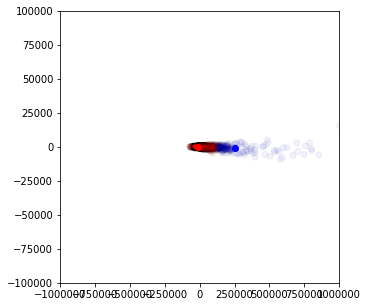

In [38]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(pca_features[:, 0], pca_features[:, 1], color=colors, alpha=0.05, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-1000000, 1000000)
plt.ylim(-100000, 100000)
plt.show()

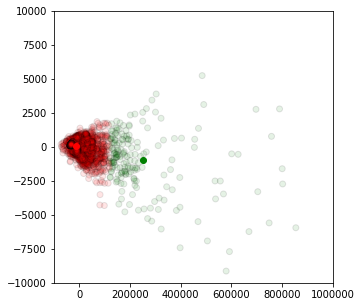

In [20]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(pca_features[:, 0], pca_features[:, 1], color=colors, alpha=0.1, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-100000, 1000000)
plt.ylim(-10000, 10000)
plt.show()

In [21]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feature_vectors)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5050 samples in 23.079s...
[t-SNE] Computed neighbors for 5050 samples in 265.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5050
[t-SNE] Computed conditional probabilities for sample 2000 / 5050
[t-SNE] Computed conditional probabilities for sample 3000 / 5050
[t-SNE] Computed conditional probabilities for sample 4000 / 5050
[t-SNE] Computed conditional probabilities for sample 5000 / 5050
[t-SNE] Computed conditional probabilities for sample 5050 / 5050
[t-SNE] Mean sigma: 61.994981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.624657
[t-SNE] KL divergence after 300 iterations: 1.343076


In [23]:
print(tsne_results.shape)

(5050, 2)


In [39]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(tsne_results)

colmap = {1: 'r', 2: 'g', 3: 'b'}

tsne_labels = kmeans.predict(tsne_results)
tsne_centroids = kmeans.cluster_centers_

print(tsne_labels)
print(tsne_centroids)

[2 2 2 ... 1 2 0]
[[ 8.711137   -0.10291281]
 [-4.699048    8.705606  ]
 [-4.3687754  -6.7558556 ]]


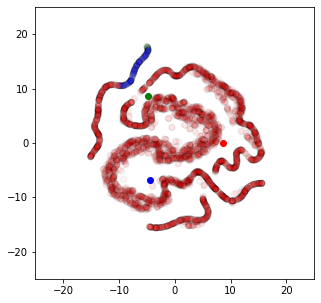

In [40]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color=colors, alpha=0.05, edgecolor='k')
for idx, centroid in enumerate(tsne_centroids):
    
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.show()

In [42]:
pca = PCA(n_components=50)
pca_features = pca.fit_transform(feature_vectors)

print(pca_features.shape)

(5050, 50)


In [43]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_features)

print(tsne_results.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5050 samples in 0.012s...
[t-SNE] Computed neighbors for 5050 samples in 0.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5050
[t-SNE] Computed conditional probabilities for sample 2000 / 5050
[t-SNE] Computed conditional probabilities for sample 3000 / 5050
[t-SNE] Computed conditional probabilities for sample 4000 / 5050
[t-SNE] Computed conditional probabilities for sample 5000 / 5050
[t-SNE] Computed conditional probabilities for sample 5050 / 5050
[t-SNE] Mean sigma: 48.755639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.546211
[t-SNE] KL divergence after 300 iterations: 1.322611
(5050, 2)


In [46]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(tsne_results)

colmap = {1: 'r', 2: 'g', 3: 'b'}

tsne_labels = kmeans.predict(tsne_results)
tsne_centroids = kmeans.cluster_centers_

print(tsne_labels)
print(tsne_centroids)

[1 1 1 ... 2 2 2]
[[ 3.552702   8.372661 ]
 [ 4.920437  -6.7452903]
 [-8.955626  -1.1696795]]


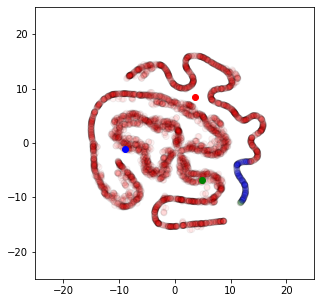

In [47]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color=colors, alpha=0.05, edgecolor='k')
for idx, centroid in enumerate(tsne_centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.show()